In [2]:
import numpy as np
import pandas as pd
import sys
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("/Users/clemens/Documents/Code/AnalysisToolbox")

import spikeAnalysisToolsV2.data_loading as data
import spikeAnalysisToolsV2.firing_rates as firing
import spikeAnalysisToolsV2.helper as helper
import spikeAnalysisToolsV2.overviews as overview

# Set Params for the Data

In [34]:
## set the Masterpath to the folder where your output is saved

masterpath = "/Users/clemens/Documents/Code/ModelClemens/output"
## set the subfolder to the Simulation you want to analyse 

subfolders = [
    "10_26-18_14_short_test_loc1"
            ]
## if more than the inital epoch is needed *1 needs to be run
extensions = [
            "initial",
             ]

object_list = data.load_testing_stimuli_info(masterpath+"/" + subfolders[0]) #assuming all the subfolders have the same
n_stimuli = np.sum(obj['count'] for obj in object_list)

current_index=0
object_indices = []
for obj in object_list:
    object_indices.append(list(range(current_index, current_index + obj['count'])))
    current_index += obj["count"]

# info_neurons is just an array of the information from above. This makes it easier to run the functions and pass the information. 
# info_times same for times
network_architecture = dict(
    num_exc_neurons_per_layer = 64*64,
    num_inh_neurons_per_layer = 32*32,
    num_layers = 4,
    #total_per_layer = num_exc_neurons_per_layer + num_inh_neurons_per_layer,
    #total_network = total_per_layer * num_layers,
    #num_stimuli = 16
)

info_times = dict(
    length_of_stimulus = 2.0,
    num_stimuli = n_stimuli,
    time_start = 1.5,
    time_end = 1.9
)

object_list

[{'count': 4, 'elements': {'1a_128', '1b_128', '1c_128', '1d_128'}},
 {'count': 4, 'elements': {'2a_128', '2b_128', '2c_128', '2d_128'}},
 {'count': 4, 'elements': {'1a_128', '1b_128', '1c_128', '1d_128'}},
 {'count': 4, 'elements': {'2a_128', '2b_128', '2c_128', '2d_128'}}]

# Import the Data

In [46]:
spikes = data.load_spikes_from_subfolders(masterpath, subfolders, extensions, False)
max(spikes[0][0].times)
#spikes[0][0].iloc[2000000:].shape
#spikes[0][0].times.values[-50]

Start


32.027847

# Visualizing Spikes
Display a scatter plots of all the spikes in all layers.

Takes quite a long time so change the field type to Raw or Code depending on wether you wanna run it.

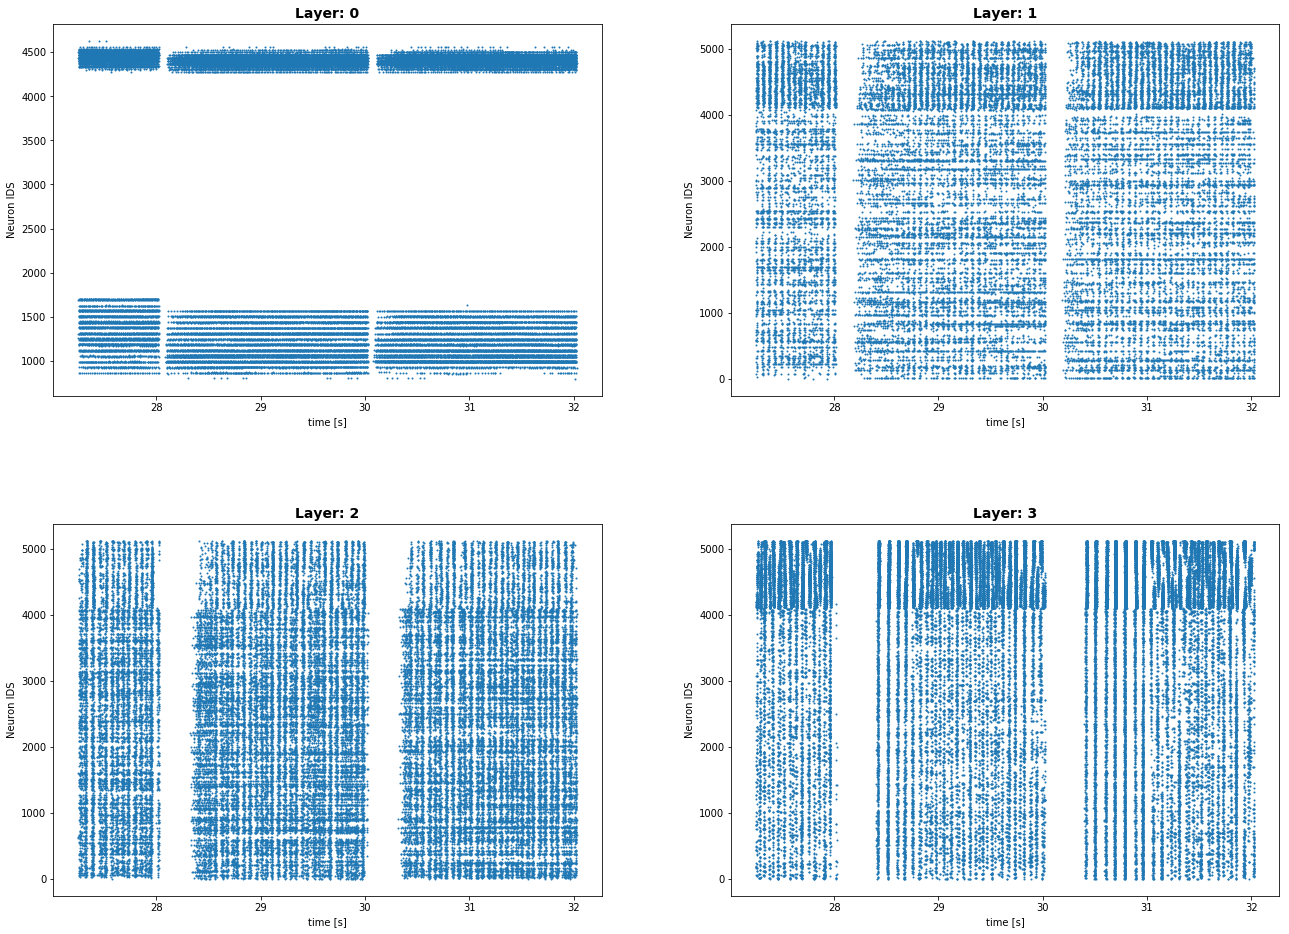

In [39]:
layerwiseSpikes = helper.split_into_layers(spikes[0][0].iloc[1000000:], network_architecture)
num_layers = len(layerwiseSpikes)

fig = plt.figure(figsize=(20,15))
for layer, layerSpikes in enumerate(layerwiseSpikes):
    subplt = fig.add_subplot(np.ceil(num_layers/2), 2, layer+1)
    plt.tight_layout(pad=8.0)
    subplt.set_title("Layer: {}".format(layer), fontsize = 14, fontweight="bold")
    subplt.set_xlabel("time [s]")
    subplt.set_ylabel("Neuron IDS")
                #plt.title("Extension " + str(extension_index) + " Layer " + str(layers_of_interest[layer]), fontsize = 10)
                #print(spikes_per_layer[layer])
    _ = subplt.scatter(layerSpikes.times, layerSpikes.ids, marker='.', s=4)

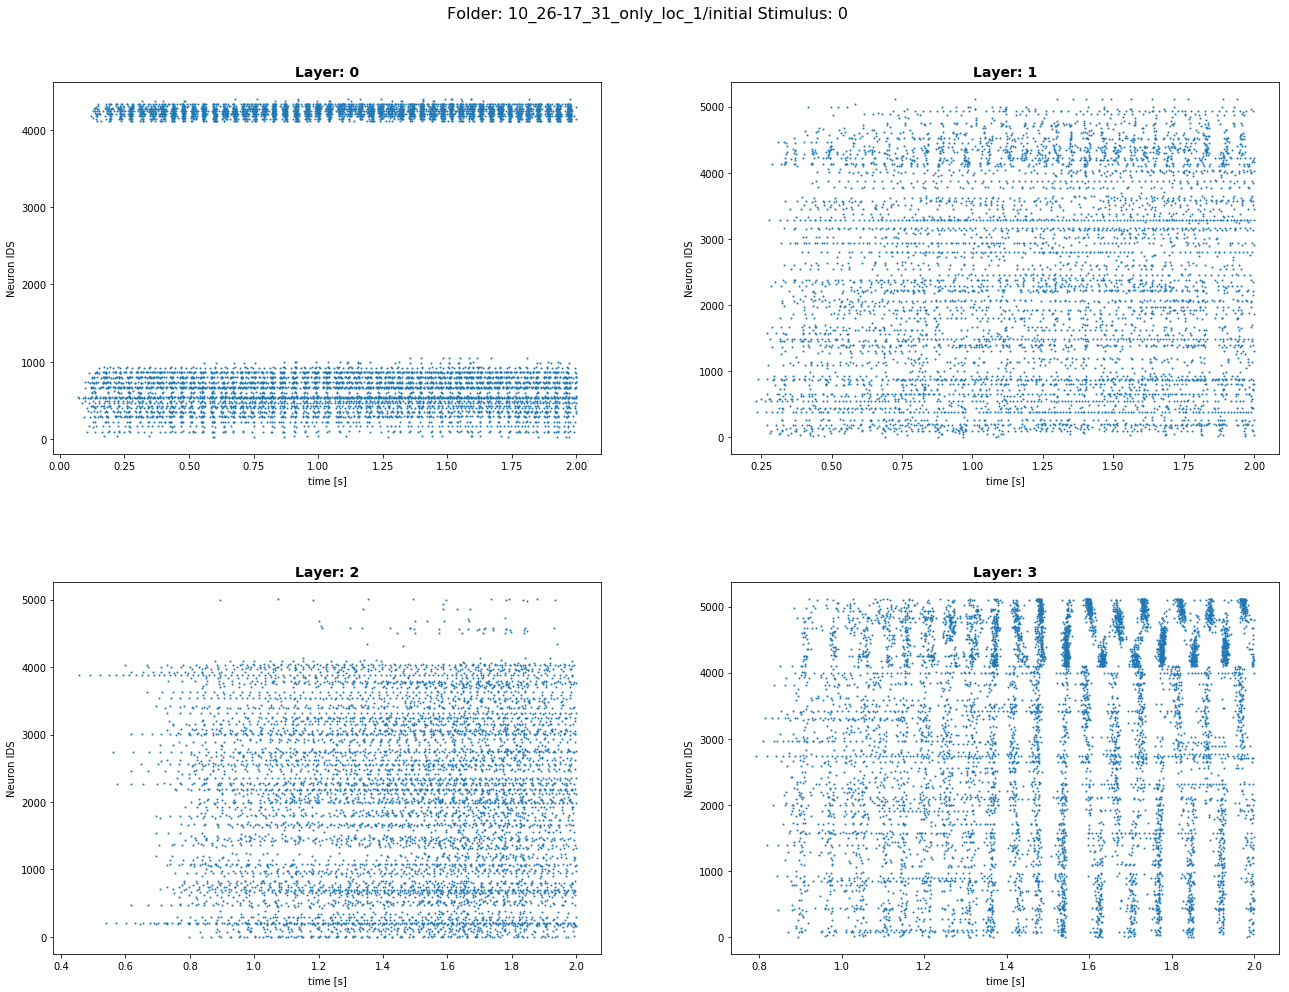

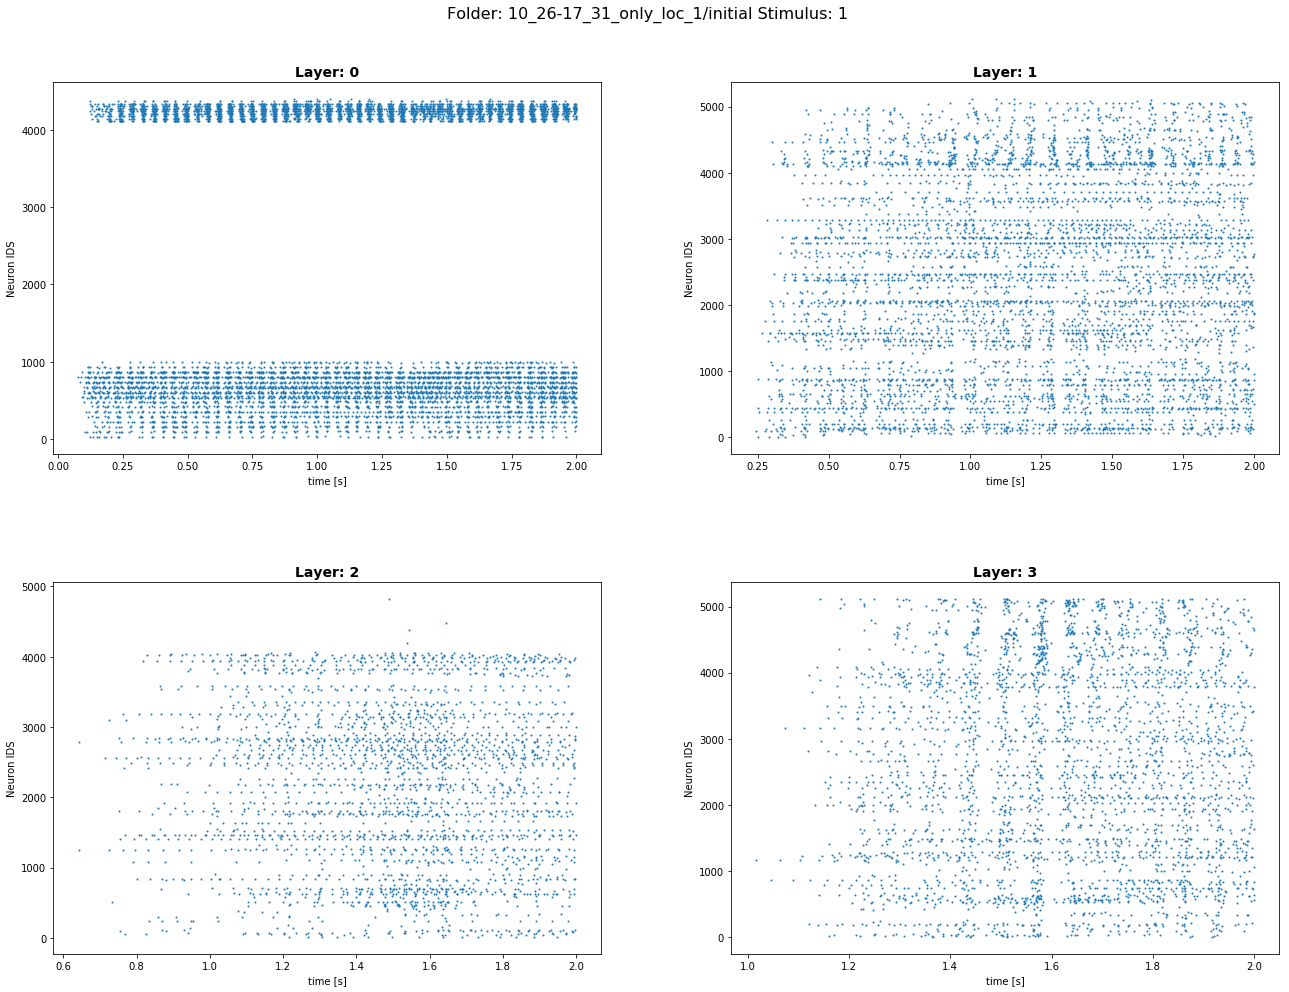

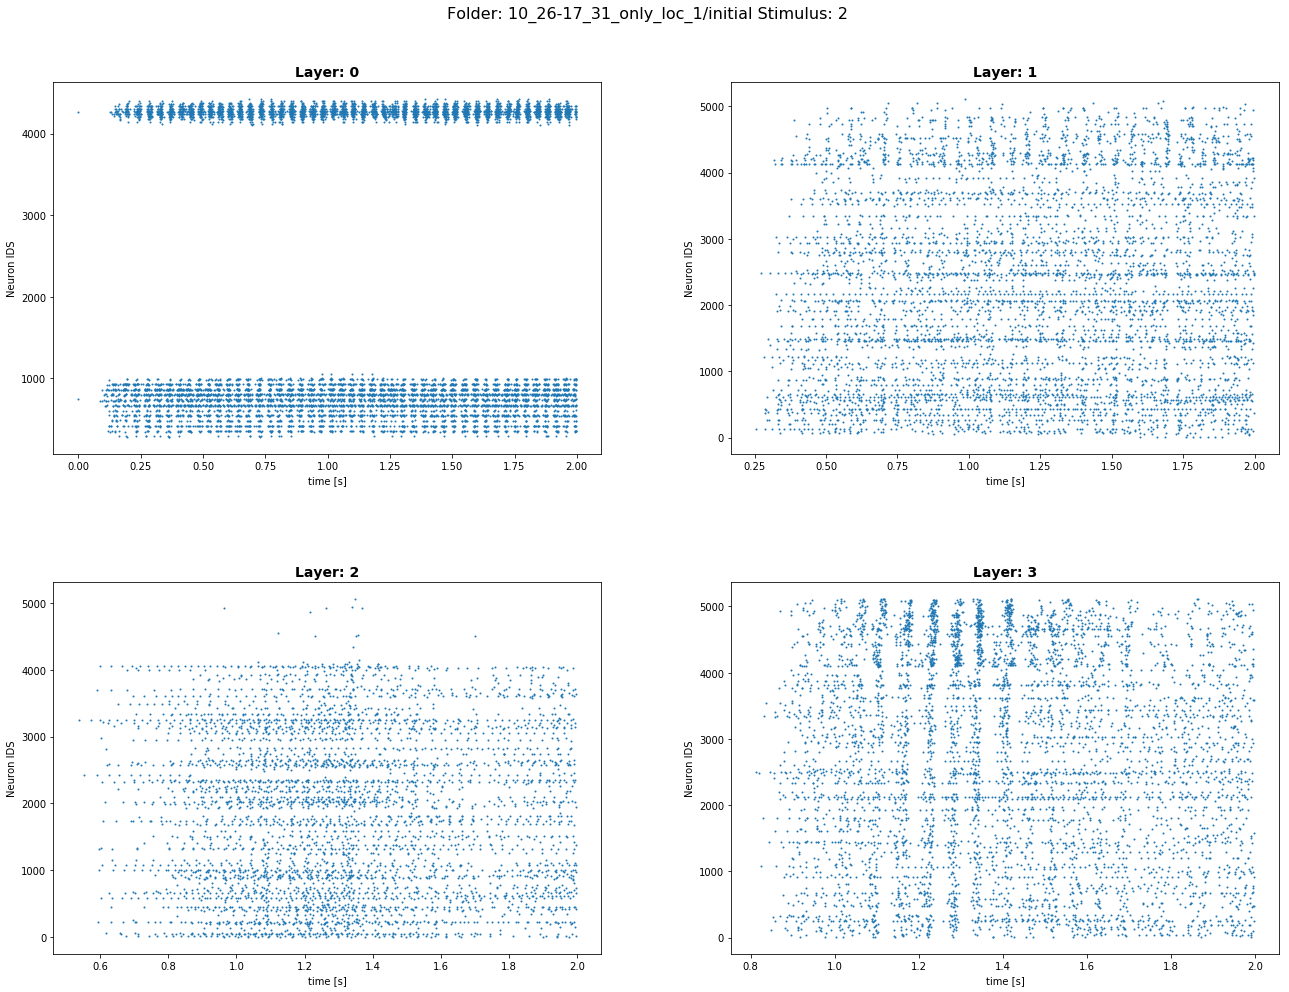

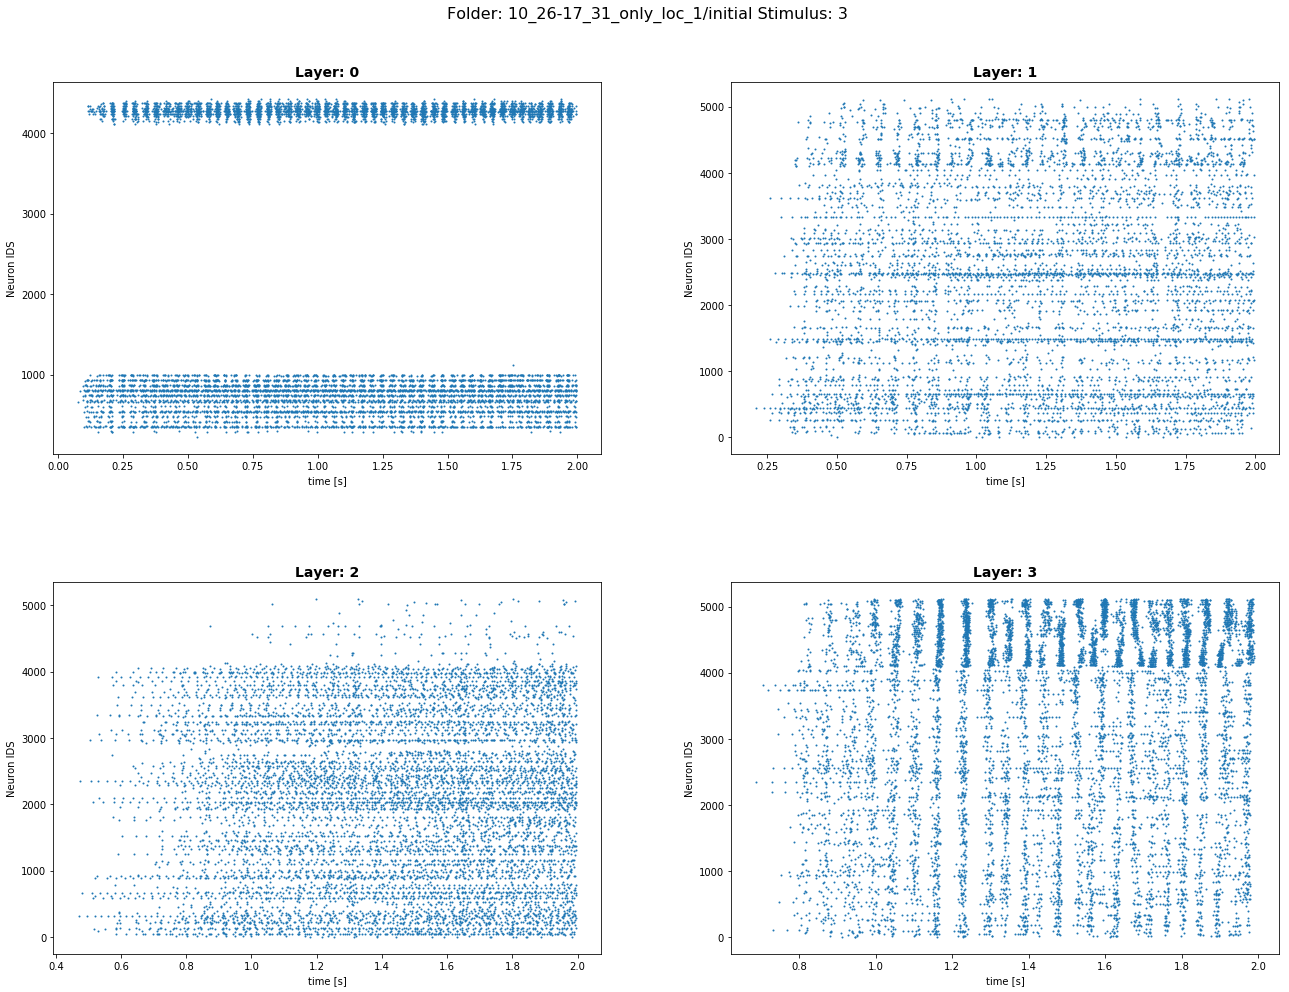

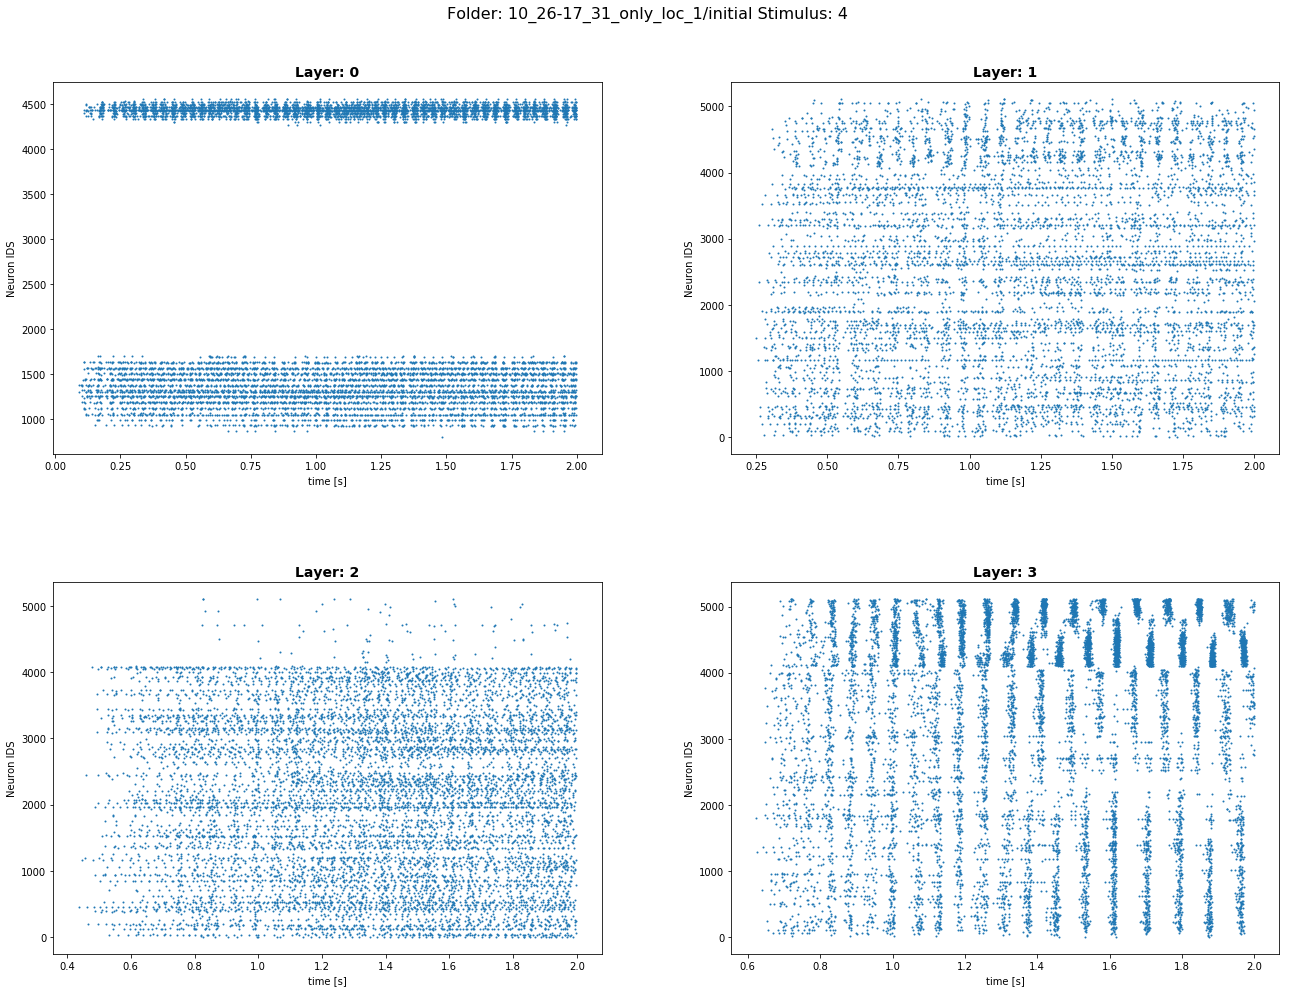

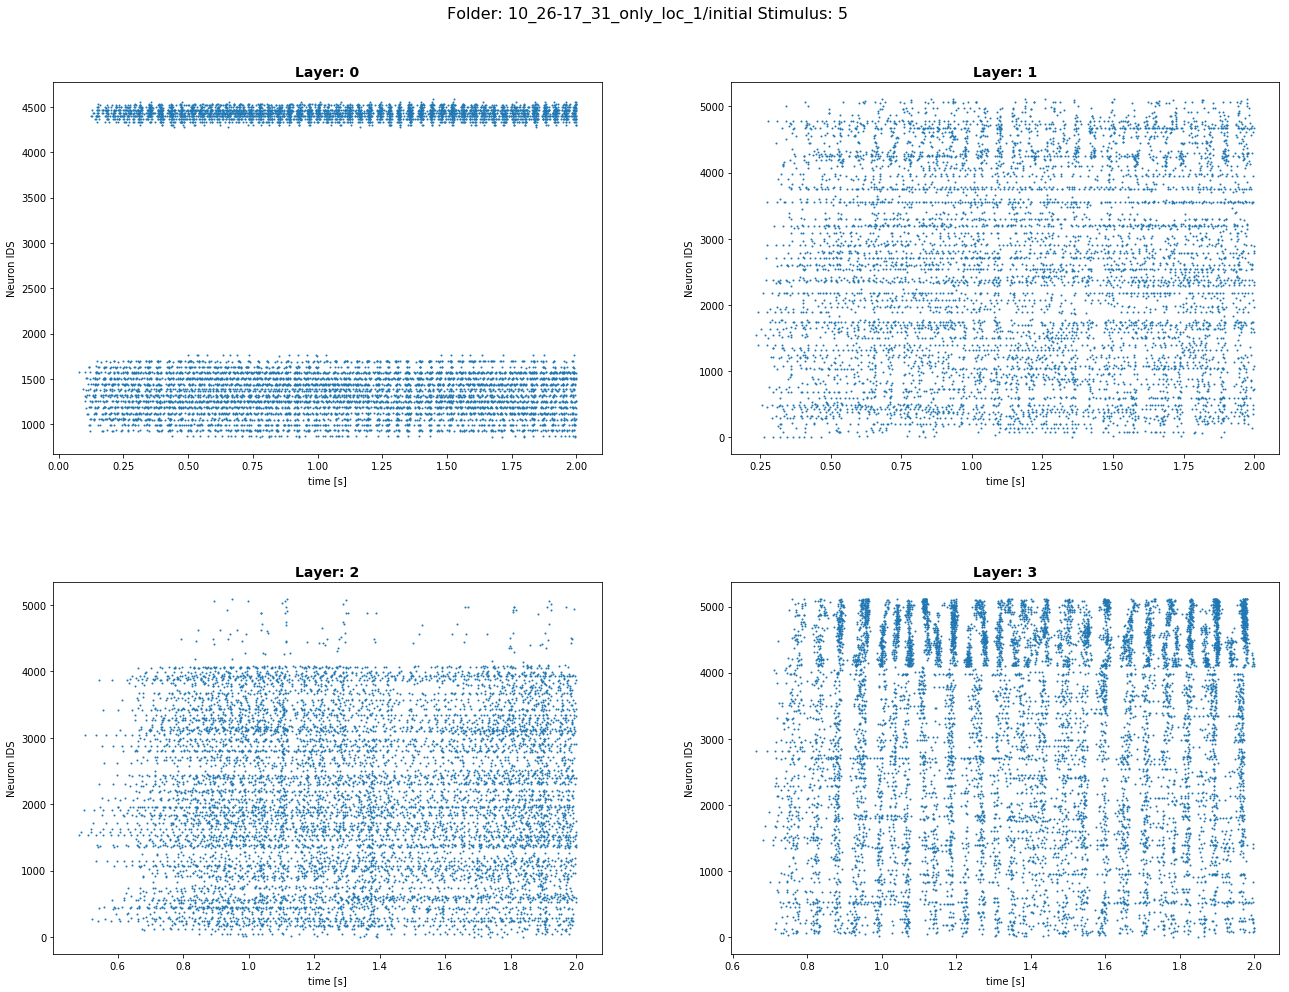

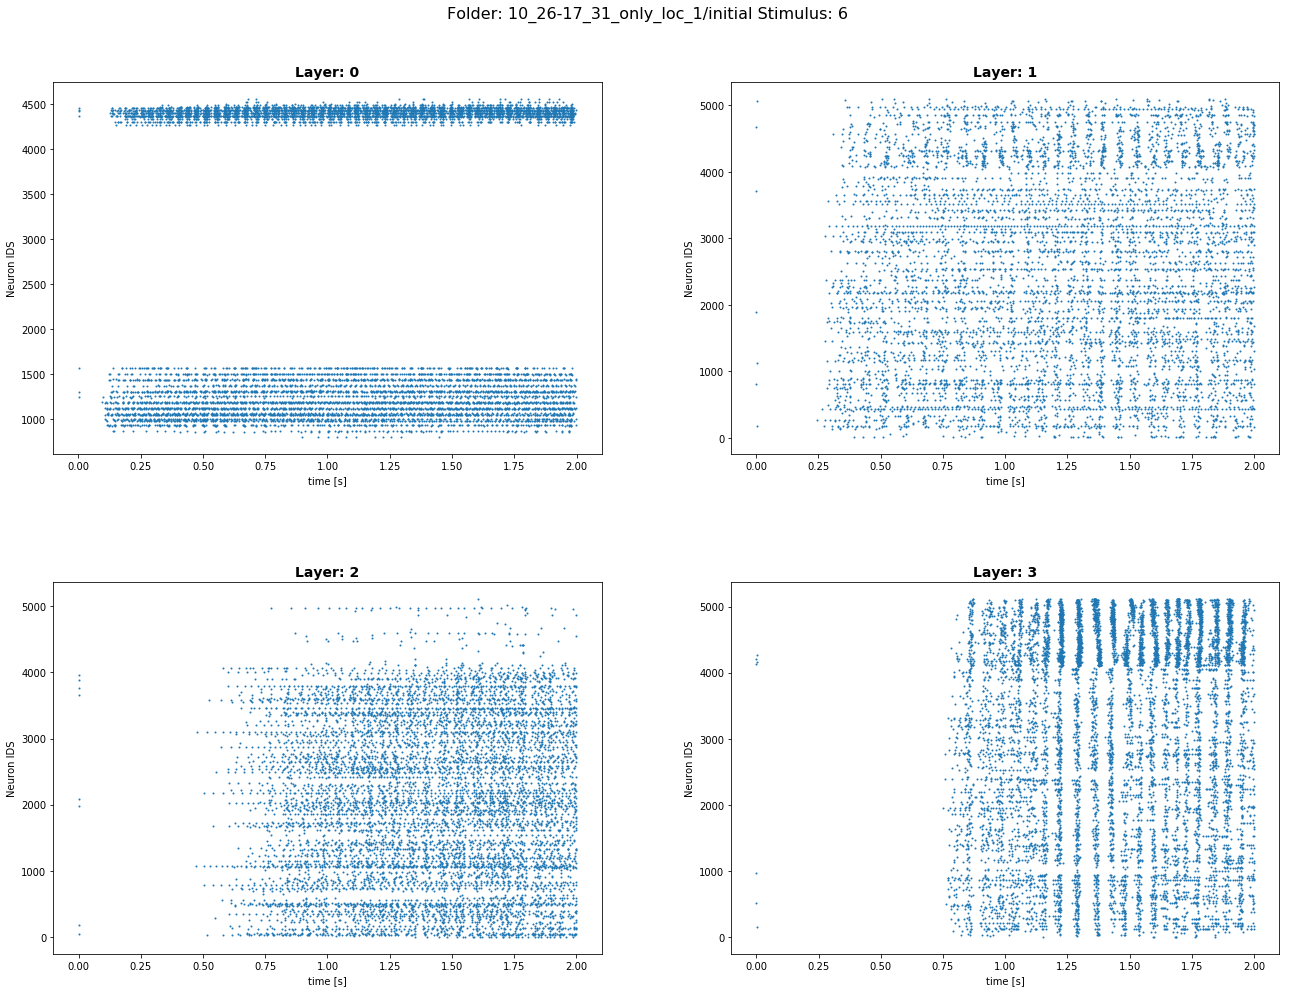

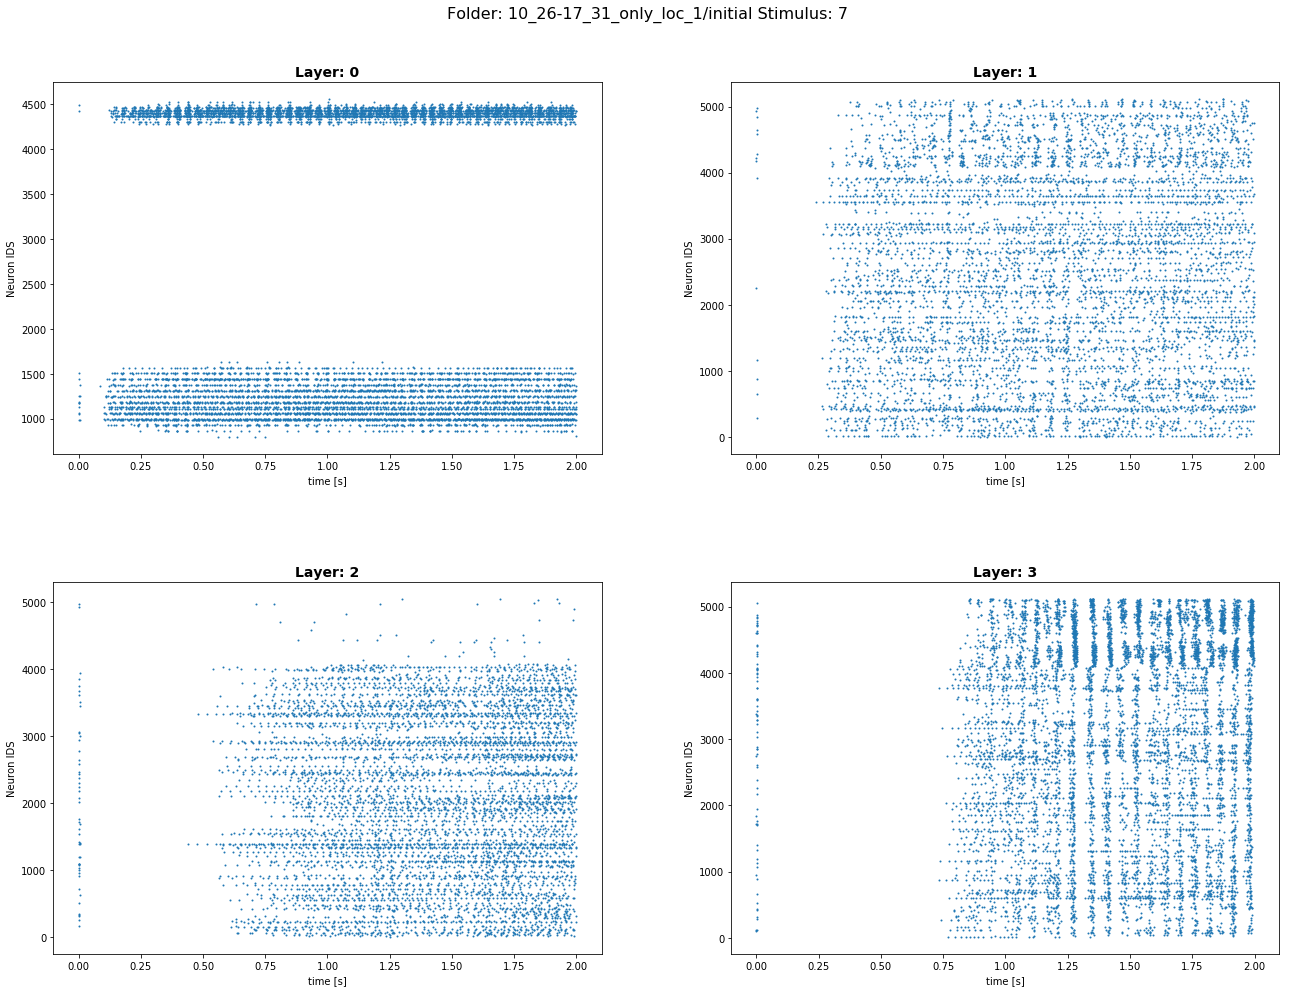

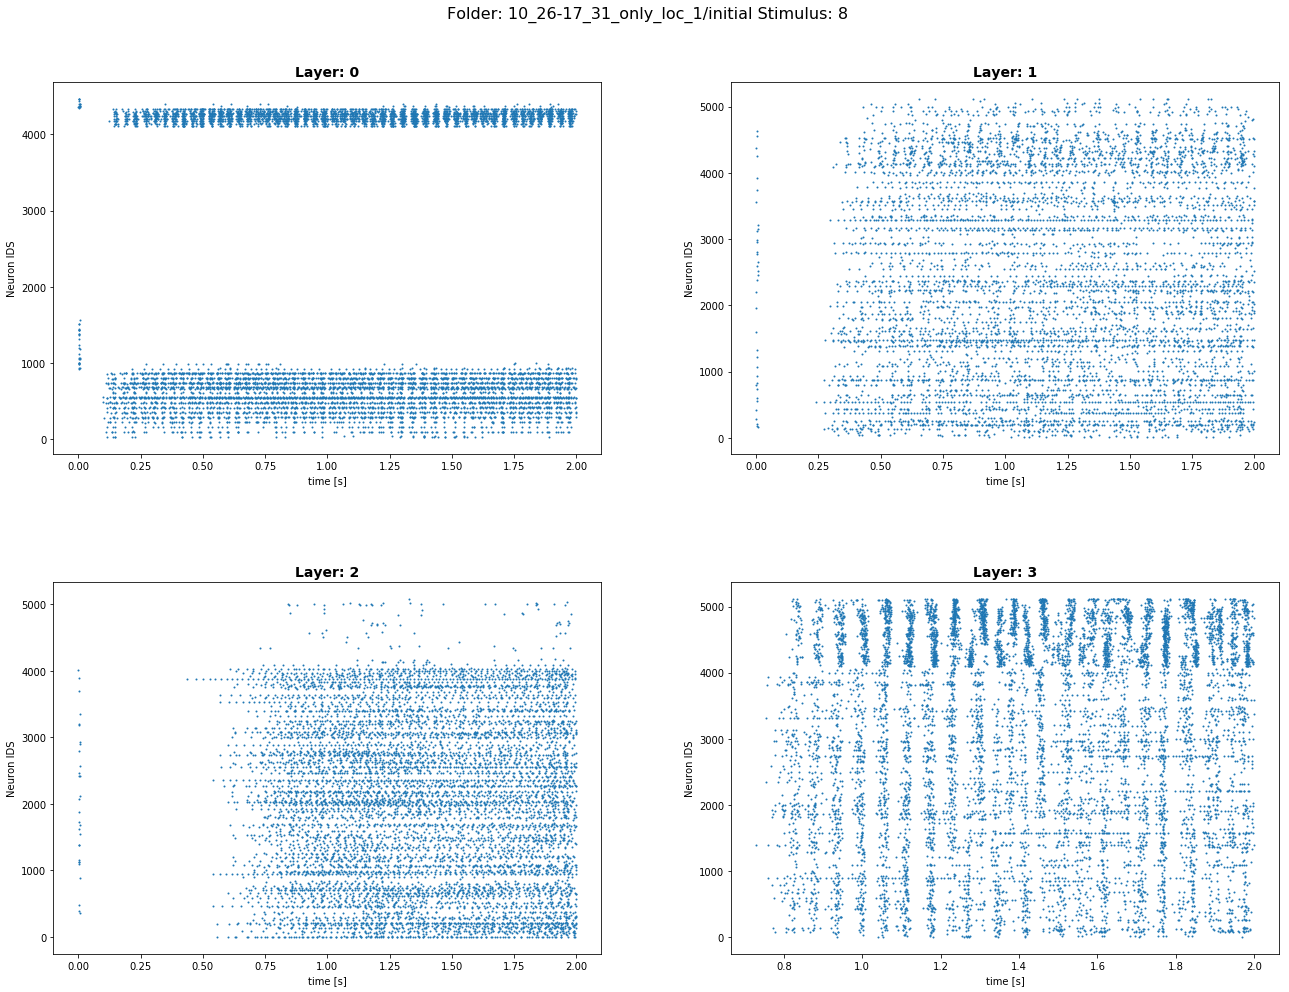

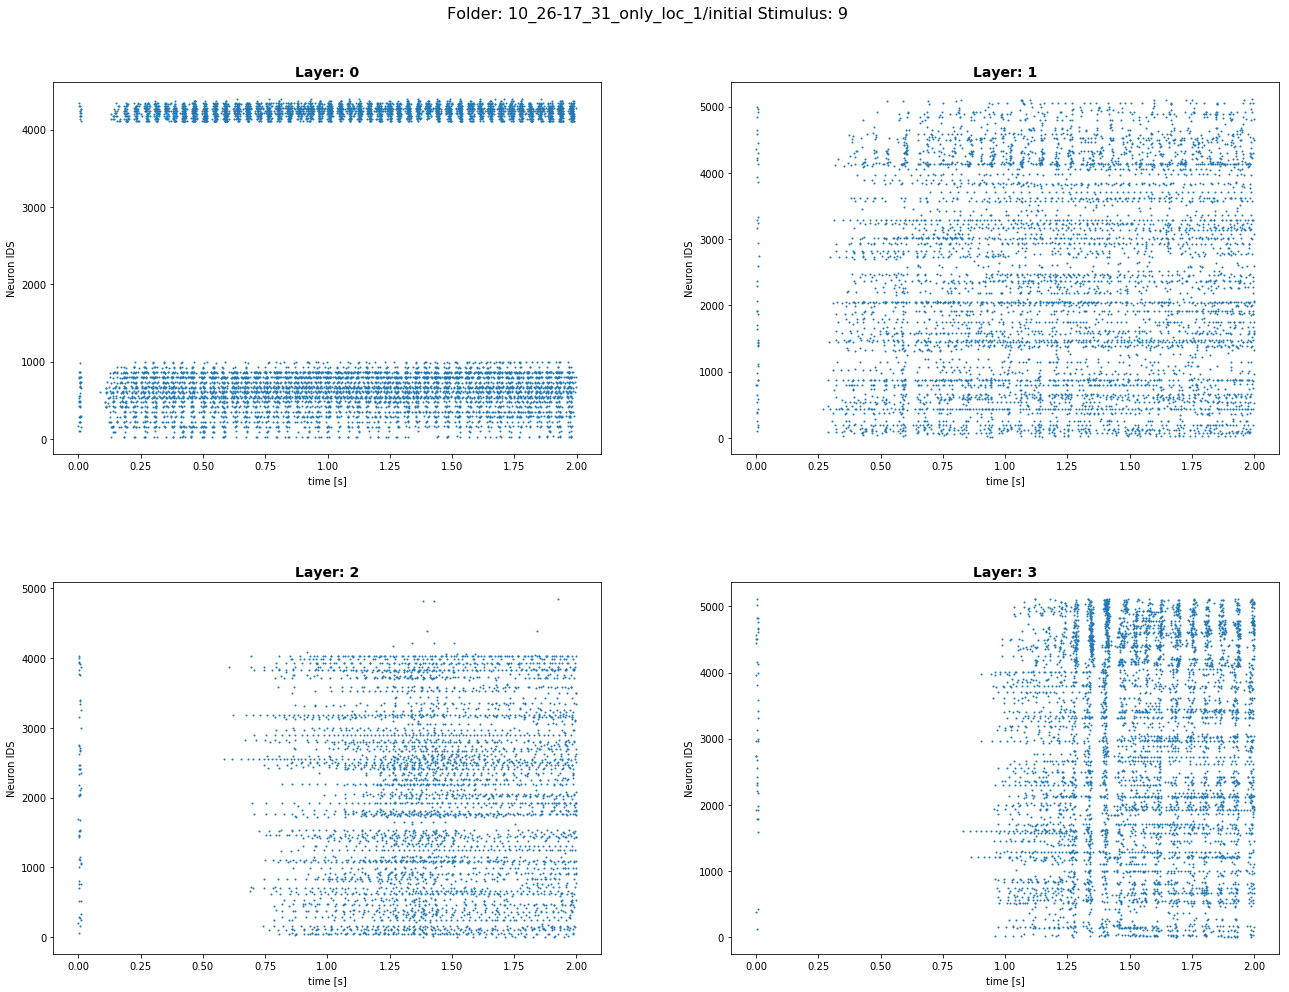

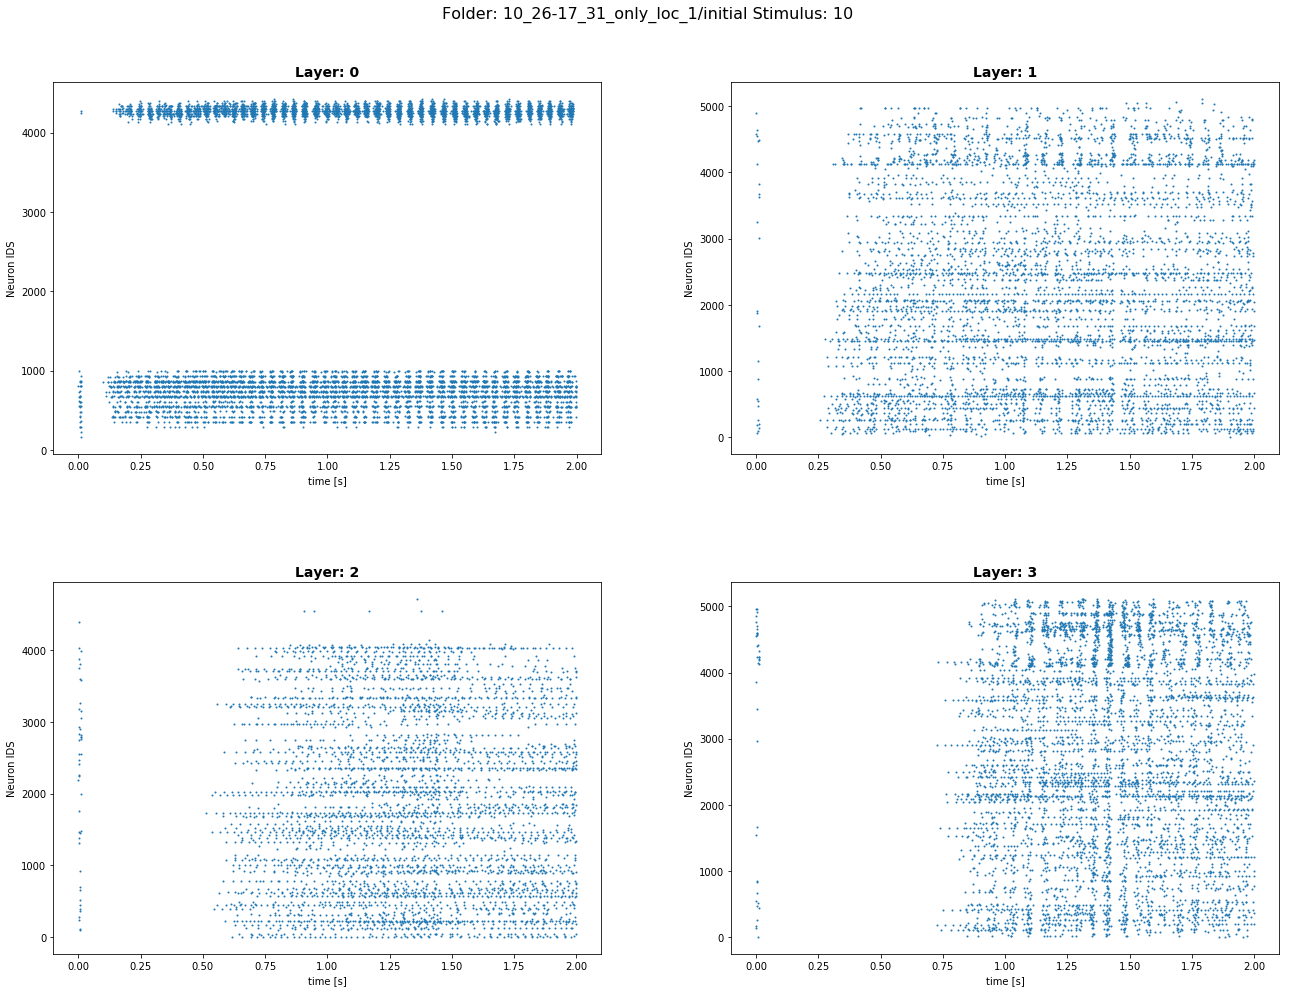

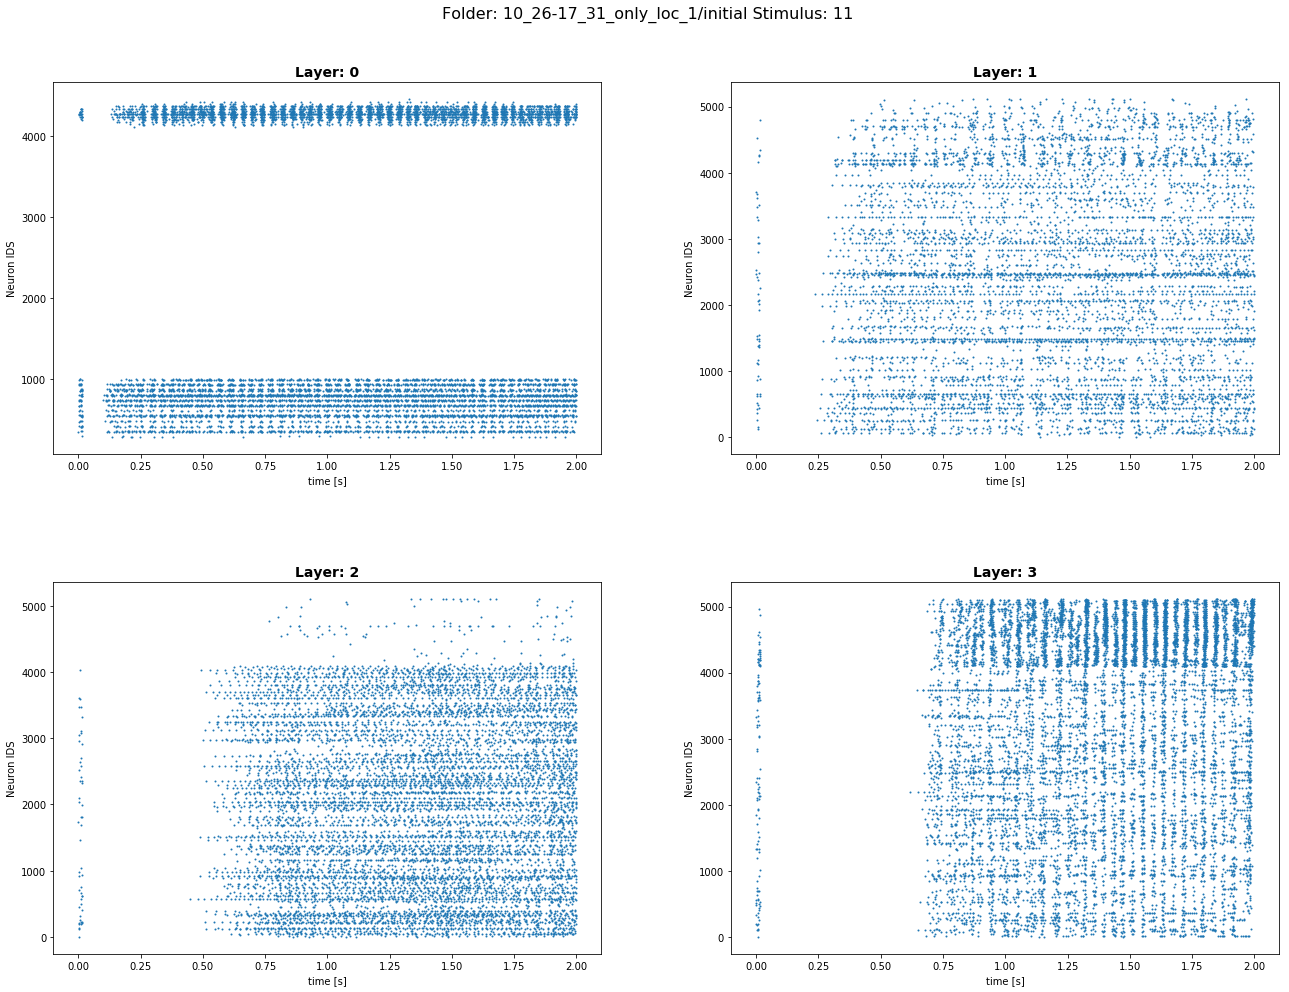

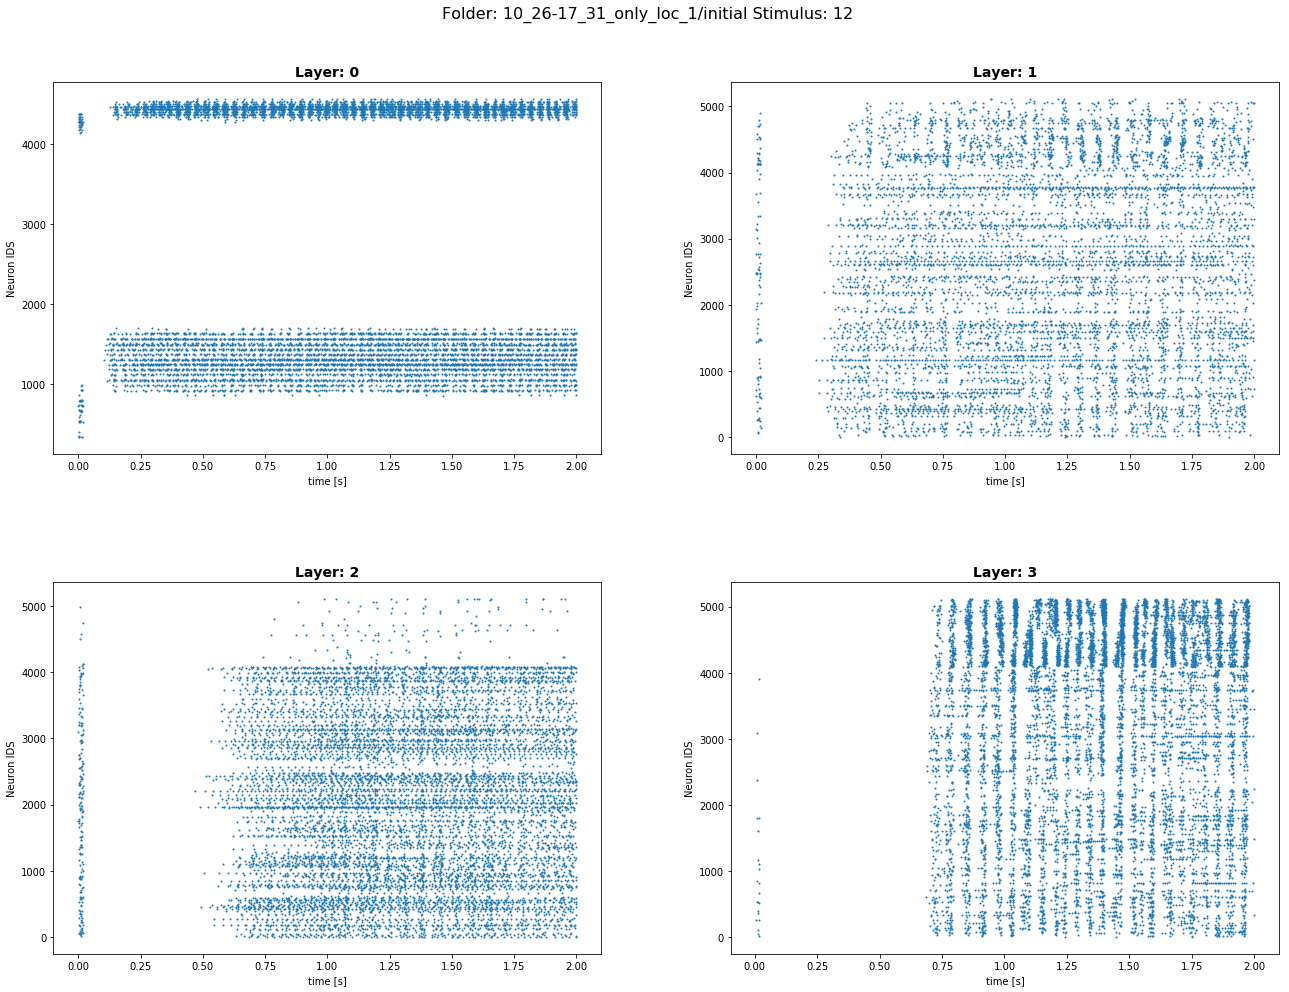

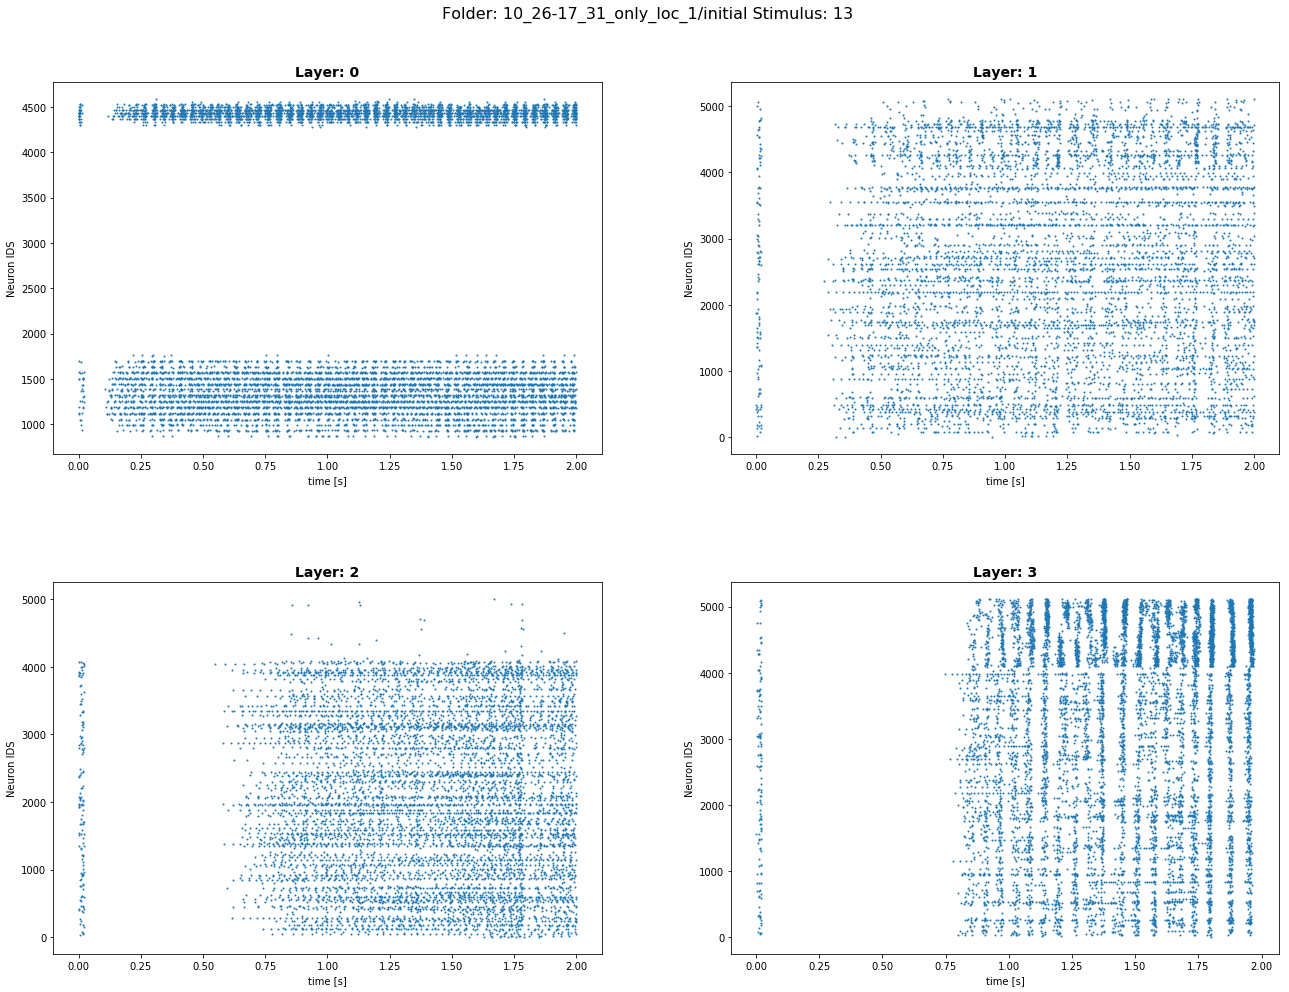

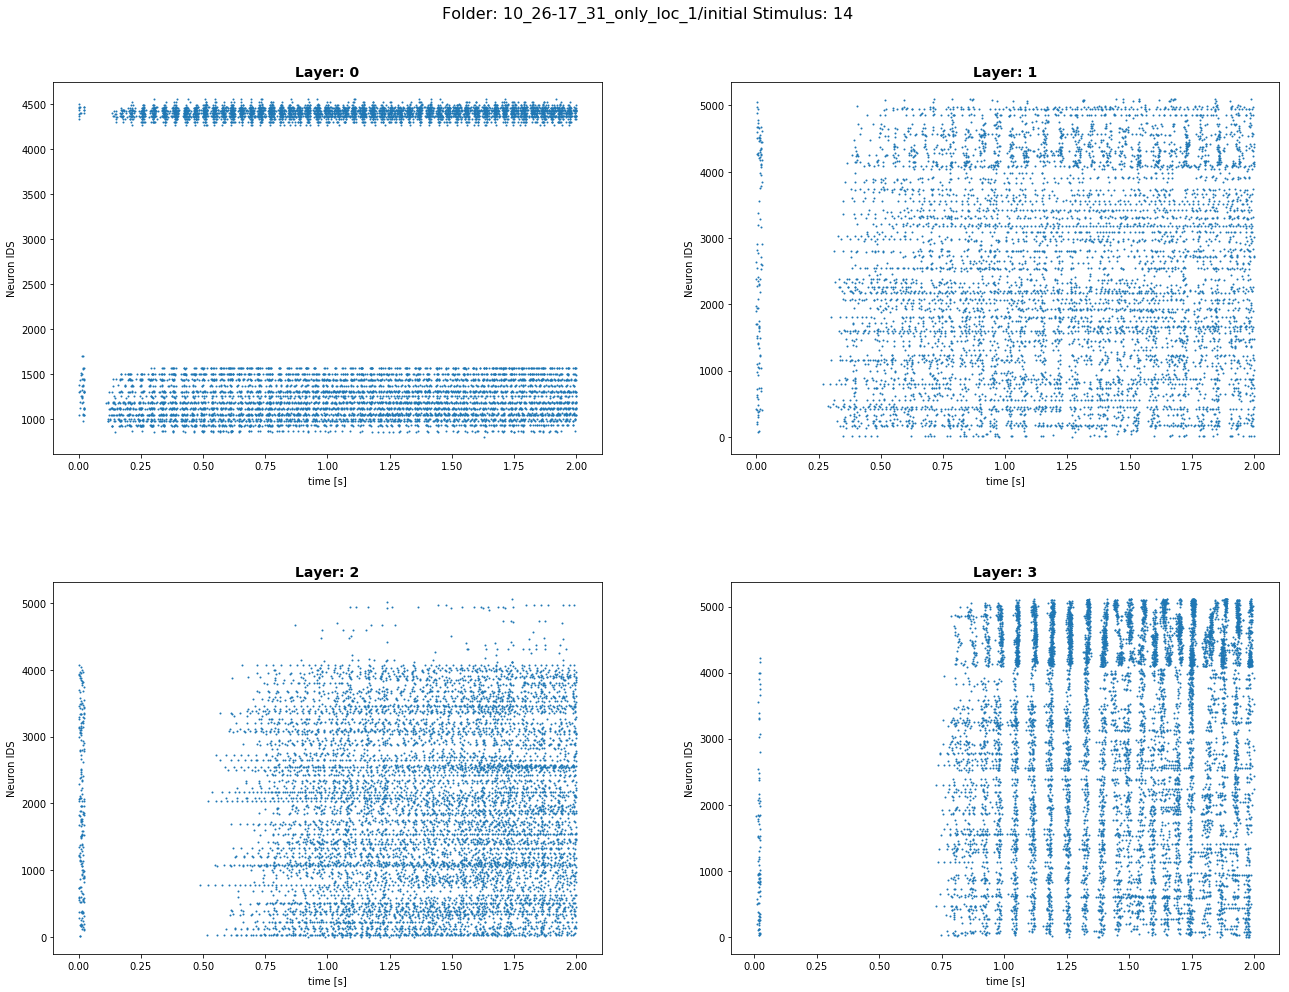

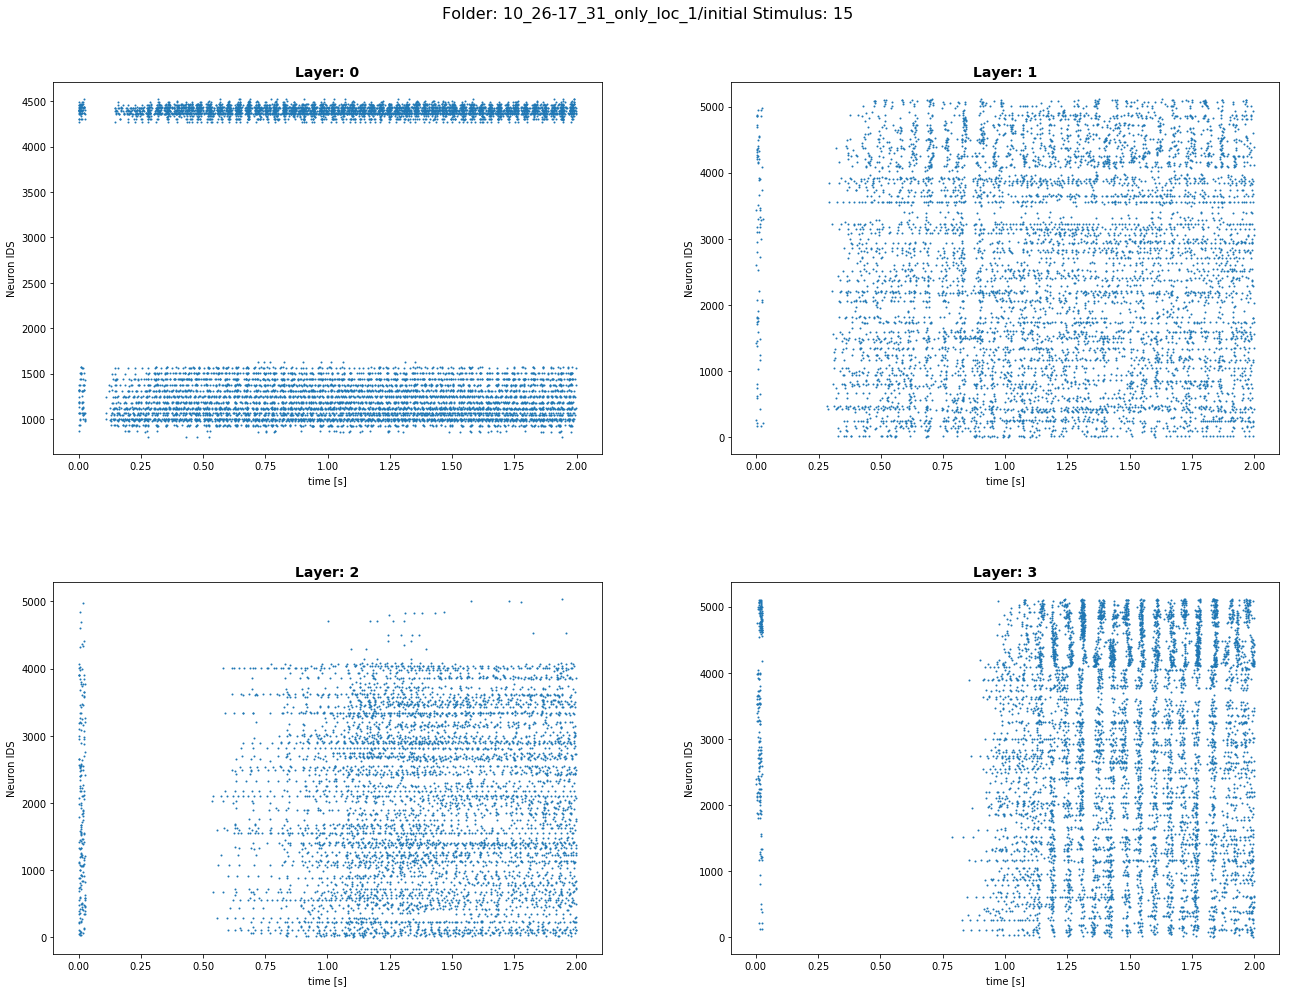

In [12]:
num_layers = network_architecture['num_layers']
num_stimuli = info_times["num_stimuli"]
stimuli = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]


for subfolder in range(len(subfolders)):
    for extension_index in range(len(extensions)):
        #print("{}, {}".format(subfolder, extension))
        spikes_this_atomic_folder = spikes[subfolder][extension_index]
        spikes_per_stimulus = helper.splitstimuli(spikes_this_atomic_folder, info_times["length_of_stimulus"])
        
        for stimulus in stimuli:
            spikes_per_layer = helper.split_into_layers(spikes_per_stimulus[stimulus], network_architecture_info=network_architecture)         
            
            fig = plt.figure(figsize=(20,15))
            fig.suptitle("Folder: {}/{} Stimulus: {}".format(subfolders[subfolder], extensions[extension_index], stimulus), fontsize=16)
            for layer in range(num_layers):
                subplt = fig.add_subplot(np.ceil(num_layers/2), 2, layer+1)
                plt.tight_layout(pad=8.0)
                subplt.set_title("Layer: {}".format(layer), fontsize = 14, fontweight="bold")
                subplt.set_xlabel("time [s]")
                subplt.set_ylabel("Neuron IDS")
                #plt.title("Extension " + str(extension_index) + " Layer " + str(layers_of_interest[layer]), fontsize = 10)
                #print(spikes_per_layer[layer])
                _ = subplt.scatter(spikes_per_layer[layer].times, spikes_per_layer[layer].ids, marker='.', s=4)

# Analysis of Firing Rates
### Calculating the firing rates for all stimuli in a nested structure 
It has the shape [subfolder][extension][stimulus][layer][exitator/inhibitory]
-> Idea is going more and more into detail

In [13]:
start = timer()
rates_subfolders = firing.calculate_rates_subfolder(
    spikes,
    network_architecture, 
    info_times)
print("Calulating Firing Rates took {}s".format(timer() - start))

ValueError: The last spike was after the last stimulus was presented: length_of_stimulus or num_stimuli seems to be wrong

### Print out an overview over the firing rates:

In [6]:
overview.print_firing_rates_tables(rates_subfolders, info_times, subfolders, extensions, True)

10_25-19_10_only_loc_1
Extension:  initial
Layer 0 
              Exc Mean  Exc Min  Exc Max  Inh Mean  Inh Min  Inh Max
Stimulus 0   0.616455      0.0     87.5  2.084961      0.0    107.5
Stimulus 1   0.584106      0.0     72.5  1.972656      0.0     85.0
Stimulus 2   0.606079      0.0     80.0  2.221680      0.0     95.0
Stimulus 3   0.644531      0.0     72.5  2.121582      0.0    102.5
Stimulus 4   0.603638      0.0     85.0  1.975098      0.0    102.5
Stimulus 5   0.577393      0.0     67.5  1.889648      0.0     82.5
Stimulus 6   0.596924      0.0     62.5  2.158203      0.0     82.5
Stimulus 7   0.644531      0.0     72.5  2.158203      0.0    102.5
Stimulus 8   0.587769      0.0     87.5  1.950684      0.0    115.0
Stimulus 9   0.598145      0.0     80.0  1.933594      0.0     87.5
Stimulus 10  0.609131      0.0     70.0  2.336426      0.0     85.0
Stimulus 11  0.623779      0.0     72.5  2.128906      0.0     77.5
Stimulus 12  0.591431      0.0     92.5  1.970215      0.0     

Extension:  testing/epoch180
Layer 0 
              Exc Mean  Exc Min  Exc Max  Inh Mean  Inh Min  Inh Max
Stimulus 0   0.824585      0.0    115.0  3.676758      0.0    160.0
Stimulus 1   0.792847      0.0     97.5  3.225098      0.0    130.0
Stimulus 2   0.844116      0.0    100.0  3.688965      0.0    162.5
Stimulus 3   0.855713      0.0    102.5  3.718262      0.0    135.0
Stimulus 4   0.813599      0.0    107.5  3.598633      0.0    160.0
Stimulus 5   0.809326      0.0    100.0  3.339844      0.0    137.5
Stimulus 6   0.833740      0.0     97.5  3.647461      0.0    147.5
Stimulus 7   0.833740      0.0    100.0  3.781738      0.0    145.0
Stimulus 8   0.803223      0.0    115.0  3.544922      0.0    155.0
Stimulus 9   0.820313      0.0     92.5  3.322754      0.0    140.0
Stimulus 10  0.822144      0.0    110.0  3.557129      0.0    157.5
Stimulus 11  0.852051      0.0    102.5  3.771973      0.0    137.5
Stimulus 12  0.823364      0.0    107.5  3.630371      0.0    157.5
Stimulus 

### Visualize individual neurons firing rates:
Plot showing the firing rates for each neuron with the neuron sorted according to its rank (in terms of its firing rate)

In [ ]:
num_stimuli=info_times["num_stimuli"]
num_layers= network_architecture["num_layers"]
neuron_type = 'exc'
neuron_type_id = {'exc':0, 'inh':1}[neuron_type]


for sub_id, subfolder in enumerate(subfolders):
    for ext_id, extension in enumerate(extensions):
        exitatory_rates, inhibitory_rates = helper.stimulus_layer_nested_list_2_numpy_tensor(rates_subfolders[sub_id][ext_id])
        #dimensions: [stimulus, layer, neuron_id]
        exc_rates_sorted = np.sort(exitatory_rates, axis=2) #sort so that the firing rates in each stimulus and layer are sorted
        #dimensions: [stimulus, layer, neuron_activity_rank]
        inh_rates_sorted = np.sort(inhibitory_rates, axis=2)
        
       
        for stimulus in range(num_stimuli):                        
            fig = plt.figure(figsize=(15, 7))
            fig.suptitle("Folder: {}/{} Stimulus: {}".format(subfolder, extension, stimulus), fontsize=16)
            
            subpltEX = fig.add_subplot(1, 2, 1)
            plt.tight_layout(pad=8.0)
            subpltEX.set_title("Excitatory", fontsize = 14, fontweight="bold")
            subpltEX.set_ylabel("Frequency [Hz]")
            subpltEX.set_xlabel("Neuron rank")
            subpltEX.set_ylim(0, 100)
            
            subpltIN = fig.add_subplot(1, 2, 2)
            plt.tight_layout(pad=8.0)
            subpltIN.set_title("Inhibitory", fontsize = 14, fontweight="bold")
            subpltIN.set_ylabel("Frequency [Hz]")
            subpltIN.set_xlabel("Neuron rank")
            subpltIN.set_ylim(0, 100)
            
            for layer in range(num_layers):
                subpltEX.plot(exc_rates_sorted[stimulus, layer], label="Layer {}".format(layer))               
                subpltIN.plot(exc_rates_sorted[stimulus, layer], label="Layer {}".format(layer))
                
            subpltEX.legend()

/Users/clemens/.virtualenvs/scipy/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Visualize firing rates spatially

In [ ]:
num_layers = network_architecture["num_layers"]
num_stimuli = info_times["num_stimuli"]
layer_dims_exc = int(np.sqrt(network_architecture["num_exc_neurons_per_layer"]))
layer_dims_inh = int(np.sqrt(network_architecture["num_inh_neurons_per_layer"]))

subfolder_ids = [0]
extension_ids = [0]
stimuli_ids = [0]
max_firing_rate = 80

for subfolder in subfolder_ids:
    for extension in extension_ids:
        rates_atomic_folder = rates_subfolders[subfolder][extension]
        exc_rates, inh_rates = helper.stimulus_layer_nested_list_2_numpy_tensor(rates_atomic_folder)
        #each a numpy array of shape [stimulus, layer, neuron_id]
        
        #exc_rates_imgs = exc_rates.reshape((num_stimuli, num_layers, layer_dims_exc, layer_dims_exc), order='F')
        exc_rates_imgs = helper.reshape_into_2d(exc_rates)
        inh_rates_imgs = helper.reshape_into_2d(inh_rates)
        
        for stimulus in stimuli_ids:
            fig = plt.figure(figsize=(19, 8))
            fig.suptitle("{}/{} Stimulus: {}".format(subfolders[subfolder], extensions[extension], stimulus), fontsize=16)
            
            for layer in range(num_layers):
                        
                subPlotAX = fig.add_subplot(2, num_layers, layer+1)
                           
                subPlotAX.set_title("Excitatory - Layer " + str(layer))
                subPlotAX.imshow(exc_rates_imgs[stimulus, layer, :, :], vmin=0, vmax=max_firing_rate, cmap='plasma')
                
                subPlotAXinh = fig.add_subplot(2, num_layers, num_layers + layer+1)
                           
                subPlotAXinh.set_title("Inhibitory - Layer " + str(layer))
                im = subPlotAXinh.imshow(inh_rates_imgs[stimulus, layer, :, :], vmin=0, vmax=max_firing_rate, cmap='plasma')
            
            cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
            fig.colorbar(im, cax=cax)

                    

### Animated Plots
You can pick a stimulus and it will show an animated video of the instantanious firing rate

In [ ]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
rc('animation', html='html5')

## Pick your stimulus
subfolder = 0
extension= 0
stimulus = 6
## And the time Step
time_step = 0.1

spikes_stimulus = helper.splitstimuli(spikes[subfolder][extension], 2.0)[stimulus]
times, exc, inh = firing.instant_FR_for_all_layers(spikes_stimulus, network_architecture, time_step)
n_timepoints = exc.shape[1] 
n_layers = exc.shape[0]
exc_img = helper.reshape_into_2d(exc)
inh_img = helper.reshape_into_2d(inh)

fig = plt.figure(figsize=(19,8))

exc_axes = []
inh_axes = []
for l in range(n_layers):
    exc_axes.append(fig.add_subplot(2, n_layers, 1 + l))
    exc_axes[-1].axis('off')
for l in range(n_layers):
    inh_axes.append(fig.add_subplot(2, n_layers, n_layers + 1 + l))
    inh_axes[-1].axis('off')
    
ims = []
for frame in range(n_timepoints):
    #image_arr = np.reshape(exc[3, frame, :], (64, 64), order='F')
    images_Ex = []
    images_In = []
    for l in range(n_layers):
        imEx = exc_axes[l].imshow(exc_img[l, frame, :, :], animated=True, cmap='hot', vmin=0, vmax=max_firing_rate)
        imIn = inh_axes[l].imshow(inh_img[l, frame, :, :], animated=True, cmap='hot', vmin=0, vmax=max_firing_rate)
        
        images_Ex.append(imEx)
        images_In.append(imIn)
        
    ims.append(images_Ex + images_In)

cax = fig.add_axes([0.92, 0.17, 0.03, 0.67])
fig.colorbar(imIn, cax=cax)


ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=22000)
HTML(ani.to_html5_video())